## Implanting K-means clustering algorithm

In [252]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [253]:
# read data 
data = pd.read_csv('cluster_data1.csv')

In [254]:
# check head elements
data.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [255]:
# check tail elements
data.tail()

,X1,X2,X3,X4
145,5.4,3.9,1.3,0.4
146,5.3,3.7,1.5,0.2
147,6.1,2.6,5.6,1.4
148,5.7,3.8,1.7,0.3
149,5.4,3.4,1.7,0.2


In [256]:
# set random seed
np.random.seed(123)
data.sample(n=3)

,X1,X2,X3,X4
72,5.2,3.5,1.5,0.2
112,4.8,3.4,1.9,0.2
132,7.2,3.6,6.1,2.5


In [257]:
np.random.seed(123)

In [258]:
# extract columns 
X = data[['X1', 'X2', 'X3', 'X4']].values

In [259]:
# initial K and random centriods base random seed 123
K = 3
centroids = X[np.random.choice(X.shape[0], K, replace=False)]
centroids

array([[5.2, 3.5, 1.5, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [7.2, 3.6, 6.1, 2.5]])

In [260]:
# euclidean distance
def euclidean_distance(X, centroids):
    return np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))

In [261]:
# assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = euclidean_distance(X, centroids)
    return np.argmin(distances, axis=1)

In [262]:
# recompute the centroids
def recompute_centroids(X, labels, K):
    return np.array([X[labels == k].mean(axis=0) for k in range(K)])

In [263]:
# initial plot function without cluster assignment
def plot_initial(X, centroids, title):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], s = 50, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='brown')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


In [264]:
# plot clusters and centroids
def plot(X, centroids, clusters, title):
    plt.figure()
    for k in range(len(centroids)):
        plt.scatter(X[clusters == k, 0], X[clusters == k, 1], s = 50, alpha=0.6, label=f'Cluster {k}')
        plt.scatter(centroids[k, 0], centroids[k, 1], s=100, c='brown', label=f'Centroid {k}')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [265]:
# K-means algorithm
def kmeans(X, centroids, K, max_iters=4):
    for i in range(1, max_iters+1):
        # assign clusters
        labels = assign_clusters(X, centroids)

        # plot clusters and centroids for each iteration
        plot(X, centroids, labels, f'Iteration {i}')

        # recompute centroids
        new_centroids = recompute_centroids(X, labels, K)

        # if centroids do not change, stop
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {i+1}")
            break

        # update centroids
        centroids = new_centroids

    return centroids, labels


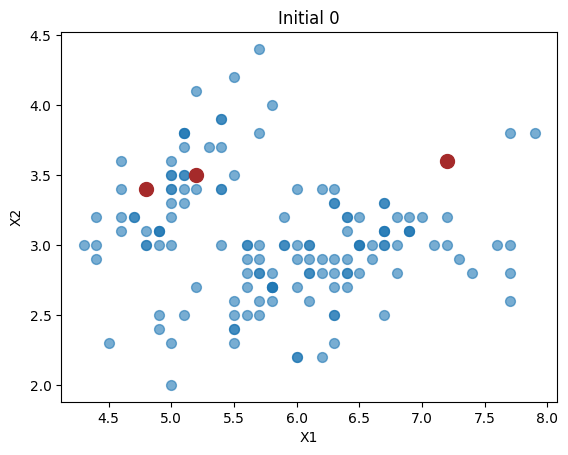

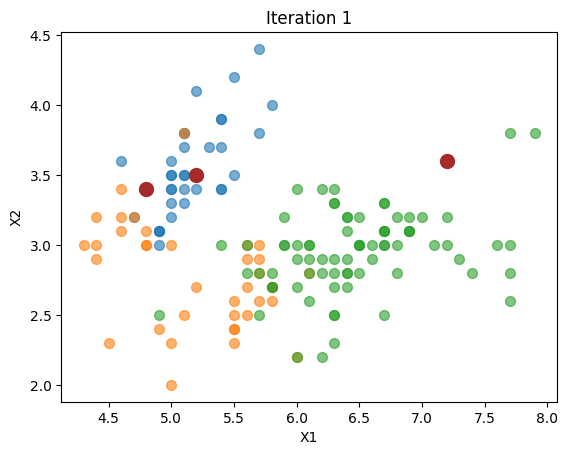

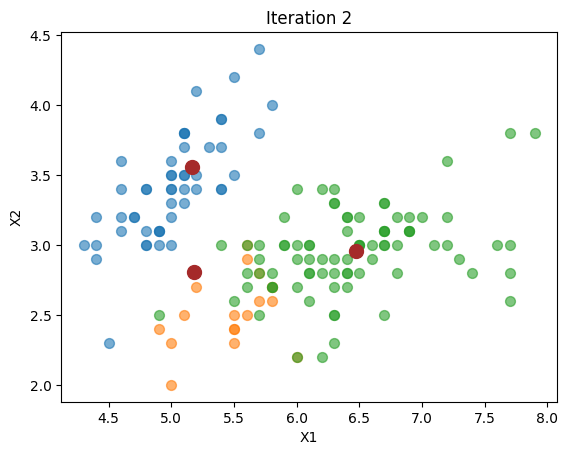

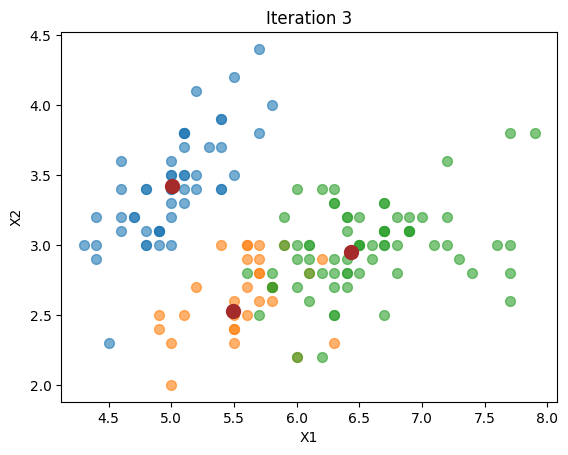

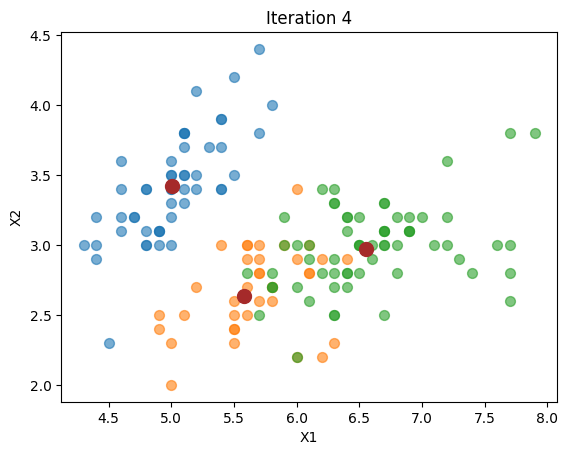

In [266]:
# plot the initial centroids before any cluster assignment
plot_initial(X, centroids, "Initial 0")

# plot and run the K-means algorithm
final_centroids, final_labels = kmeans(X, centroids, K)

## Implanting K-means++ clustering algorithm and finding K

In [267]:
# Set random seed
np.random.seed(123)

In [268]:
# Extract the necessary columns for clustering
X = data[['X1', 'X2']].values  # Using X1 and X2 for the 2D plot

In [269]:
# Number of clusters
K = 3

In [270]:
# function to initialize centroids with K-means++ like lecture
def initialize_centroids(X, K):
    centroids = []
    
    # pick the first centroid randomly
    first_centroid_idx = np.random.choice(X.shape[0])
    centroids.append(X[first_centroid_idx])
    print(f"First centroid: {X[first_centroid_idx]}")
    
    # plot with the first centroid
    plot(X, np.array(centroids), assign_clusters(X, np.array(centroids)), title="Init 0")
    
    # iteratively select the remaining 
    for i in range(1, K):
        # calculate the distance from each point to the nearest centroid
        distances = np.array([min([euclidean_distance(x[np.newaxis], c[np.newaxis])[0][0] for c in centroids]) for x in X])
        
        # select the point that is farthest from the nearest centroid
        next_centroid_idx = np.argmax(distances)
        centroids.append(X[next_centroid_idx])
        print(f"New centroid: {X[next_centroid_idx]}")
        
        # plot after adding each new centroid
        plot(X, np.array(centroids), assign_clusters(X, np.array(centroids)), title=f"Init {i}")
    
    return np.array(centroids)

In [271]:
# K-means function using the revised methods
def kmeans_pp(X, K, max_iters=5):
    # initialize centroids using K-means++ logic
    centroids = initialize_centroids(X, K)
    
    # iterate over the main K-means loop (starting from iteration 1)
    for i in range(1, max_iters + 1):
        # Assign each point to the nearest centroid
        labels = assign_clusters(X, centroids)
        
        # recompute centroids by averaging the points in each cluster
        new_centroids = recompute_centroids(X, labels, K)
        
        # plot the clusters and centroids for each iteration
        plot(X, new_centroids, labels, title=f'Iteration {i}')
        
        # if centroids don't change, break the loop
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {i}")
            break
        centroids = new_centroids
    
    return centroids, labels


First centroid: [5.6 2.5]


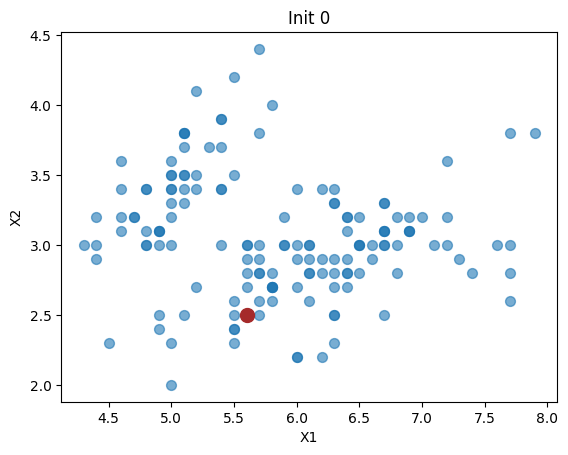

New centroid: [7.9 3.8]


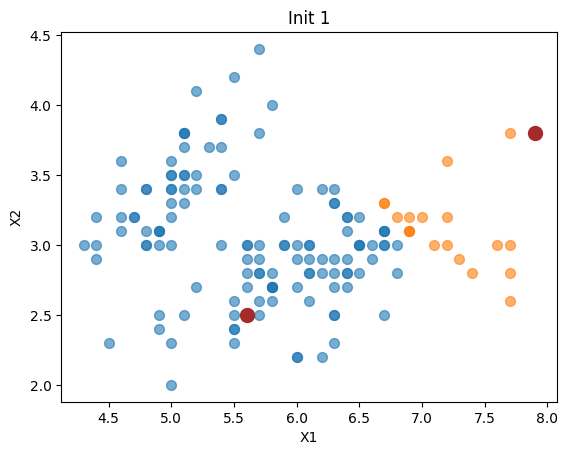

New centroid: [5.7 4.4]


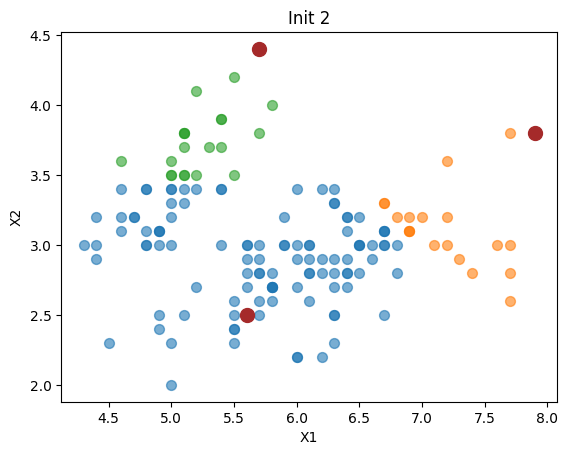

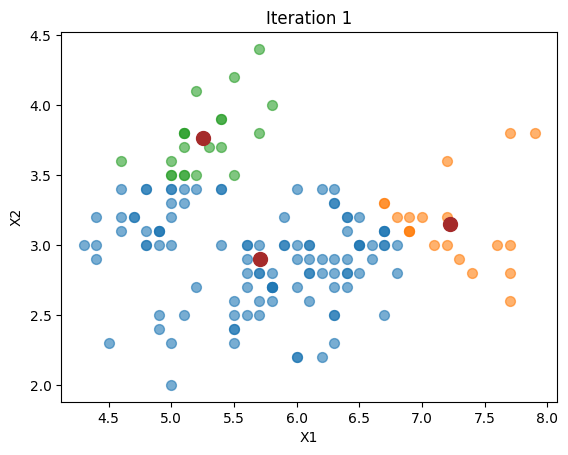

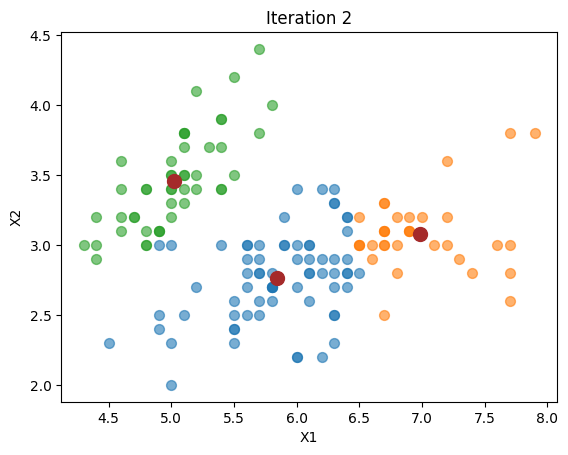

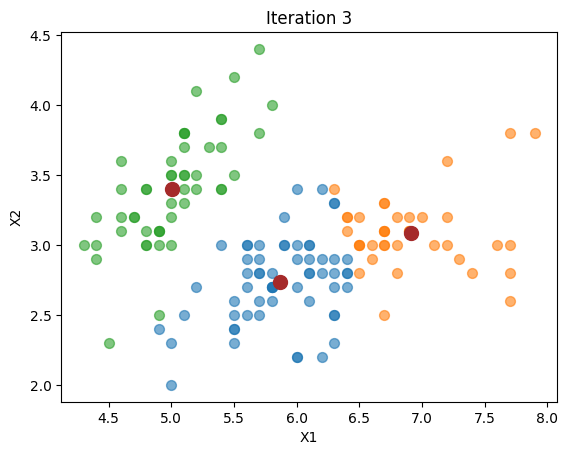

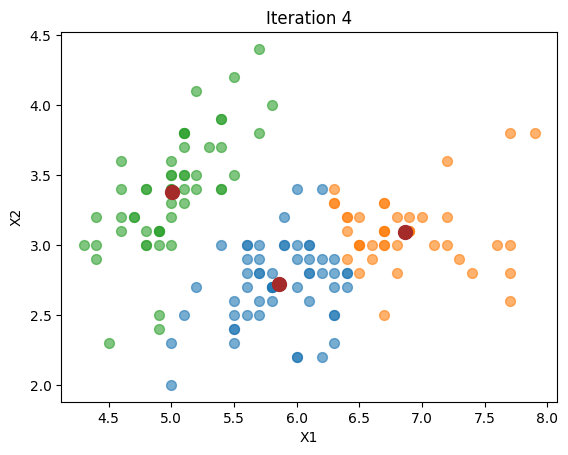

In [272]:
# run the K-means++ algorithm
final_centroids, final_clusters = kmeans_pp(X, K, max_iters=4)

## Implanting KNN classification


In [273]:
# read data
data_cluster1 = pd.read_csv('cluster_data1.csv')  
data_cluster2 = pd.read_csv('cluster_data2.csv')  

In [280]:
data_cluster1.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [281]:
data_cluster2.head()

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05


In [274]:
# extract columns
X_train = data_cluster1[['X1', 'X2', 'X3', 'X4']].values  # training data (cluster 1)
X_test = data_cluster2[['X1', 'X2', 'X3', 'X4']].values   # test data (cluster 2)

In [275]:
# take cluster from question 2
y_train = final_clusters

In [276]:
K = 3
# init empty list to hold predictions 
knn_labels = []

In [277]:
# loop through each test point
for test_point in X_test:
    # calculate distances from test point to all training points
    distances = [np.linalg.norm(test_point - train_point) for train_point in X_train]
    
    # Ggt the indices of the K nearest neighbors
    k_indices = np.argsort(distances)[:K]
    
    # get the labels of the K nearest neighbors
    k_nearest_labels = y_train[k_indices]
    
    # assign the most common label (majority voting)
    majority_label = np.bincount(k_nearest_labels).argmax()
    
    # add the prediction to the list
    knn_labels.append(majority_label)

In [278]:
# convert predictions to numpy array
knn_labels = np.array(knn_labels)

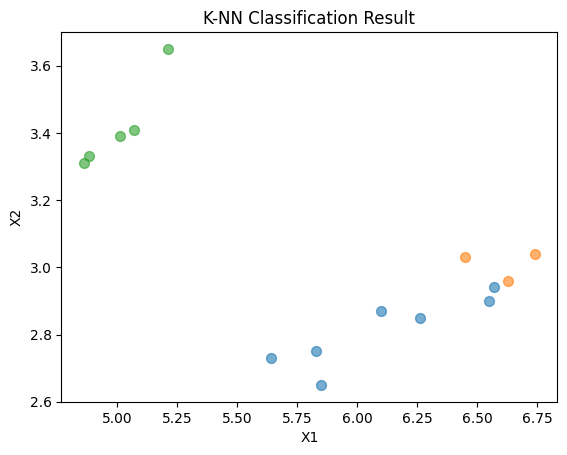

In [279]:
# plot the results using X1 and X2
plt.figure()
for k in np.unique(knn_labels):
    plt.scatter(X_test[knn_labels == k, 0], X_test[knn_labels == k, 1], s=50, alpha=0.6)
plt.title('K-NN Classification Result')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()